Escogimos el train de 1m, el indicador del rsi solo, y los parametros optimos que ya teniamos, ahora lo probaremos en el test.

In [1]:
from prediction import def_trading_strategy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import matplotlib.pyplot as plt

data = pd.read_csv("aapl_1m_test.csv")
rsi_data = ta.momentum.RSIIndicator(data.Close, window=14)
data["RSI"] = rsi_data.rsi()
data = data.dropna()

rsi, port_value, ca = def_trading_strategy(data, 39, 0.88, 1.05, 23, data["RSI"])

In [2]:
print("Dinero al final de seguir la estrategia de Trading: ", rsi)

Dinero al final de seguir la estrategia de Trading:  54119.30221912501


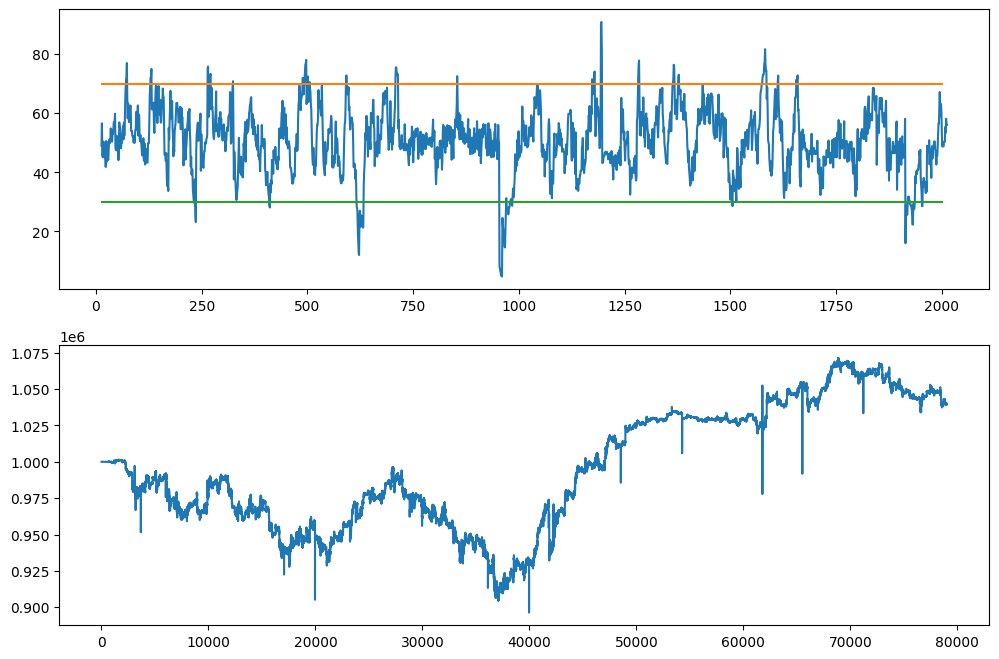

In [3]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(data.RSI[:2000])
ax[0].plot([14,2000], [70,70], label="Upper Threshold")
ax[0].plot([14,2000], [30,30], label="Lower Threshold")
ax[1].plot(port_value)

In [4]:
def calcular_dinero_final(prices, initial_money):
    dinero_actual = initial_money
    acciones = 0

    for price in prices:
        # Calcula cuántas acciones puedes comprar con tu dinero actual
        acciones_comprables = dinero_actual // price
        # Calcula el dinero restante después de comprar acciones
        dinero_actual -= acciones_comprables * price
        # Añade las acciones compradas a tu total
        acciones += acciones_comprables

    # Calcula el valor total de tus acciones al final
    dinero_final = acciones * prices[len(data["Close"])] + dinero_actual
    return dinero_final

# Ejemplo de uso

monto_inicial = 1000000  # 1,000,000 de pesos
precios = data["Close"]

dinero_final = calcular_dinero_final(precios, monto_inicial)-monto_inicial
print("Dinero final después de invertir sin ninguna estrategia:", dinero_final)


Dinero final después de invertir sin ninguna estrategia: 21031.560000000056


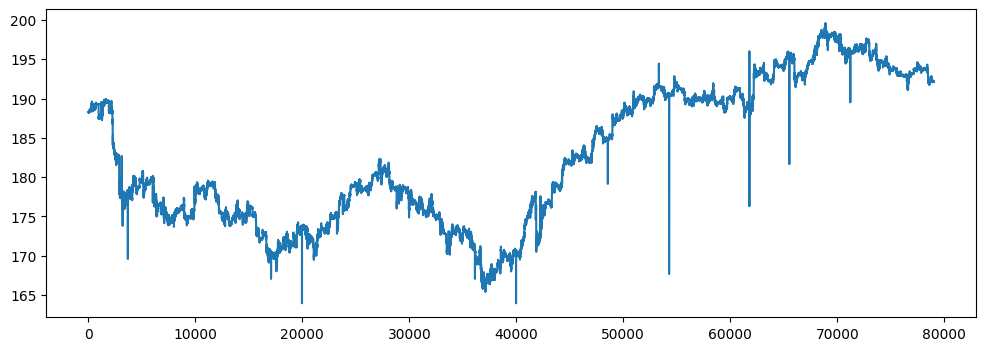

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(data["Close"])